In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mm_env import SimpleEnv
import pandas as pd
from utils import evaluate
from dataclasses import dataclass

In [2]:
%run './all_agents.ipynb' # import all agents

In [3]:
env = SimpleEnv(debug=False, T=100, lambda_neg=15, lambda_pos=10, kappa=10, Q=4)

### Random

In [4]:
agent_random = RandomAgent(env_d=env.d)

In [5]:
logs_random, stats_random = evaluate(agent_random, env, num_episodes=100)

### Q Learning

In [6]:
agent_q = QAgent(env_d=env.d, env_Q=env.Q, env_T=env.T)

In [12]:
agent_Q = QAgent(env_d=env.d, env_Q=env.Q, env_T=env.T, 
                 epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.3)

num_episodes = 3000
num_steps = 200

for episode in range(num_episodes):
    # Initialize
    env.reset()
    state = env.state()
    done = False
    total_reward = 0

    for step in range(num_steps):
        action = agent_Q.get_action(state)
        next_state, reward, done = env.step(action)
        agent_Q.update_Q(state, action, reward, next_state)
        state = next_state
        total_reward += reward
        if done:
            break

    # Decay epsilon
    agent_Q.decay_epsilon()

    # Print episode results
    if (episode + 1) % 100 == 0:
        print(f'Episode: {episode + 1}, Total Reward: {total_reward}')

Episode: 100, Total Reward: 61.331322990174
Episode: 200, Total Reward: 88.65626581827065
Episode: 300, Total Reward: 24.0047529723562
Episode: 400, Total Reward: 51.92979824382966
Episode: 500, Total Reward: 60.35828976515721
Episode: 600, Total Reward: 57.927052729801424
Episode: 700, Total Reward: 70.36943427449212
Episode: 800, Total Reward: 26.138445040279542
Episode: 900, Total Reward: 71.2010146083967
Episode: 1000, Total Reward: -26.49099996578702
Episode: 1100, Total Reward: -23.529377138196494
Episode: 1200, Total Reward: -7.323893644441056
Episode: 1300, Total Reward: 4.622662760993638
Episode: 1400, Total Reward: -22.041405015993057
Episode: 1500, Total Reward: 28.428416597566454
Episode: 1600, Total Reward: 38.43911416500589
Episode: 1700, Total Reward: 64.41133811348877
Episode: 1800, Total Reward: 30.807030650820906
Episode: 1900, Total Reward: 81.9095267213671
Episode: 2000, Total Reward: 59.25481773479169
Episode: 2100, Total Reward: 47.02378328349628
Episode: 2200, To

In [13]:
logs_q, stats_q = evaluate(agent_q, env, num_episodes=100)

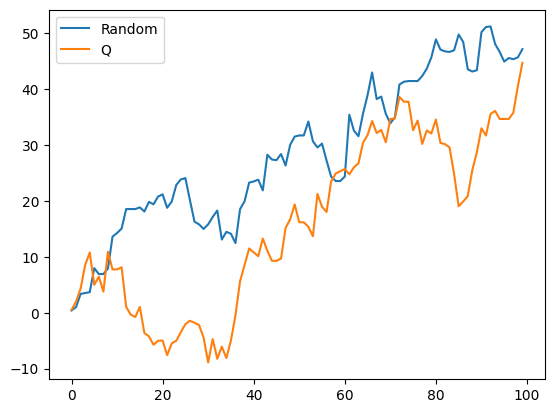

In [14]:
#plot rewards
plt.plot(logs_random['rewards'], label='Random')
plt.plot(logs_q['rewards'], label='Q')
plt.legend()
plt.show()

In [16]:
#print stats_q and stats_random in a table without considering the last two keys of stats_q
df = pd.DataFrame([stats_q, stats_random]).T
df.columns = ['QAgent', 'RandomAgent']
df

,QAgent,RandomAgent
mean_reward,32.763038,32.049683
min_reward,-87.925531,-59.199403
max_reward,115.964070,136.721457
std_reward,33.267603,37.927823
